In [1]:
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
data = pd.read_csv("Fisheririsdata.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal_length    150 non-null float64
Sepal_width     150 non-null float64
Petal_length    150 non-null float64
Petal_width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None


In [3]:
data['Species_ID'] = pd.Categorical(data['Species']).codes  
#Converting from categorical to numerical and creating a new column at the same time

In [4]:
#data

#### Creating the dataframe
The resulting DataFrame will have its index assigned automatically as with Series, and the columns are placed in sorted order

In [5]:
#frame = DataFrame(data)  #this line is not required as the *pd.read_csv* will read into a dataframe

In [6]:
#frame

A column in a DataFrame can be retrieved as a Series either by dict-like notation or by attribute

In [7]:
#data['Sepal_length']

In [8]:
#data.Sepal_length

In [9]:
#frame

#### Data Agregation

In [10]:
data.sum()

Sepal_length                                                876.5
Sepal_width                                                 458.6
Petal_length                                                563.7
Petal_width                                                   180
Species         I. setosaI. setosaI. setosaI. setosaI. setosaI...
Species_ID                                                    150
dtype: object

In [11]:
#data.sum(axis=1) #will sums over the rows instead

In [12]:
data.describe()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species_ID
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.200000,1.000000
std,0.828066,0.435866,1.765298,0.761401,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [13]:
data.corr()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species_ID
Sepal_length,1.000000,-0.117570,0.871754,0.817942,0.782561
Sepal_width,-0.117570,1.000000,-0.428440,-0.365431,-0.426658
Petal_length,0.871754,-0.428440,1.000000,0.962746,0.949035
Petal_width,0.817942,-0.365431,0.962746,1.000000,0.956522
Species_ID,0.782561,-0.426658,0.949035,0.956522,1.000000


In [14]:
data.cov()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species_ID
Sepal_length,0.685694,-0.042434,1.274315,0.515705,0.530872
Sepal_width,-0.042434,0.189979,-0.329656,-0.121275,-0.152349
Petal_length,1.274315,-0.329656,3.116278,1.294027,1.372483
Petal_width,0.515705,-0.121275,1.294027,0.579732,0.596644
Species_ID,0.530872,-0.152349,1.372483,0.596644,0.671141


In [15]:
grouped = data['Petal_width'].groupby(data['Species'])
grouped.mean()

Species
I. setosa        0.248
I. versicolor    1.326
I. virginica     2.026
Name: Petal_width, dtype: float64

In [16]:
grouped.describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
I. setosa,50.0,0.248,0.105444,0.1,0.2,0.2,0.3,0.6
I. versicolor,50.0,1.326,0.197753,1.0,1.2,1.3,1.5,1.8
I. virginica,50.0,2.026,0.274650,1.4,1.8,2.0,2.3,2.5


In [17]:
grouped = data.groupby(data['Species'])
grouped.mean()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species_ID
Species,,,,,
I. setosa,5.006,3.428,1.462,0.248,0
I. versicolor,5.936,2.770,4.260,1.326,1
I. virginica,6.588,2.974,5.552,2.026,2


In [18]:
grouped.describe()

Petal_length                                               \
                     count   mean       std  min  25%   50%    75%  max   
Species                                                                   
I. setosa             50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9   
I. versicolor         50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1   
I. virginica          50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9   

              Petal_width        ...  Sepal_width      Species_ID            \
                    count   mean ...          75%  max      count mean  std   
Species                          ...                                          
I. setosa            50.0  0.248 ...        3.675  4.4       50.0  0.0  0.0   
I. versicolor        50.0  1.326 ...        3.000  3.4       50.0  1.0  0.0   
I. virginica         50.0  2.026 ...        3.175  3.8       50.0  2.0  0.0   

                                        
               min  25%  50%  75%  max  
Species                                 
I. setosa      0.0  0.0  0.0  0.0  0.0  
I. versicolor  1.0  1.0  1.0  1.0  1.0  
I. virginica   2.0  2.0  2.0  2.0  2.0  

[3 rows x 40 columns]

In [20]:
for name, group in data.groupby(data['Species']): 
    print(name)
    print(group.describe())

I. setosa
       Sepal_length  Sepal_width  Petal_length  Petal_width  Species_ID
count      50.00000    50.000000     50.000000    50.000000        50.0
mean        5.00600     3.428000      1.462000     0.248000         0.0
std         0.35249     0.379064      0.173664     0.105444         0.0
min         4.30000     2.300000      1.000000     0.100000         0.0
25%         4.80000     3.200000      1.400000     0.200000         0.0
50%         5.00000     3.400000      1.500000     0.200000         0.0
75%         5.20000     3.675000      1.575000     0.300000         0.0
max         5.80000     4.400000      1.900000     0.600000         0.0
I. versicolor
       Sepal_length  Sepal_width  Petal_length  Petal_width  Species_ID
count     50.000000    50.000000     50.000000    50.000000        50.0
mean       5.936000     2.770000      4.260000     1.326000         1.0
std        0.516171     0.313798      0.469911     0.197753         0.0
min        4.900000     2.000000      3.

### Visualization

Python has many visualization tools, the most basic is matplotlib (http://matplotlib.sourceforge.net).

Plots in matplotlib reside within a Figure object. You can create a new figure with plt.figure.  You can’t make a plot with a blank figure. You have to create one or more subplots using add_subplot.

In [21]:
#fig = plt.figure()
# Manually
#ax1 = fig.add_subplot(2, 2, 1)
#ax2 = fig.add_subplot(2, 2, 2)
#ax3 = fig.add_subplot(2, 2, 3)
#ax4 = fig.add_subplot(2, 2, 4)

# or using the subplot method
#fig = plt.figure()
#fig, axes = plt.subplots(2, 2,sharex=True, sharey=True)
#axes = plt.subplots_adjust(left=None, bottom=1, right=None, top=2, wspace=None, hspace=0.5)


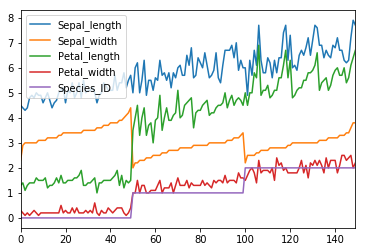

In [22]:
fig1=data.plot(kind='line')


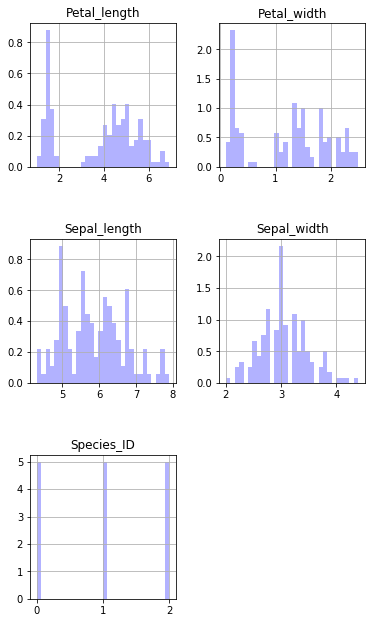

In [23]:
data.hist(bins=30, alpha=0.3, color='b', normed=True)
plt.subplots_adjust(left=None, bottom=1, right=None, top=3, wspace=None, hspace=0.5) #adjusting spacing

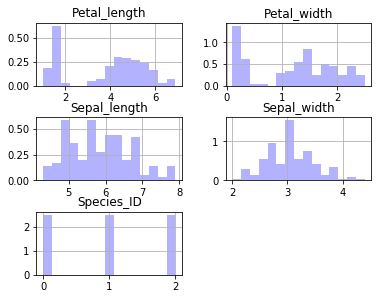

In [24]:
data.hist(bins=15, alpha=0.3, color='b', normed=True)
data['Sepal_length'].plot(kind='kde', style='k--')
plt.subplots_adjust(left=None, bottom=None, right=None, top=1, wspace=None, hspace=0.5)

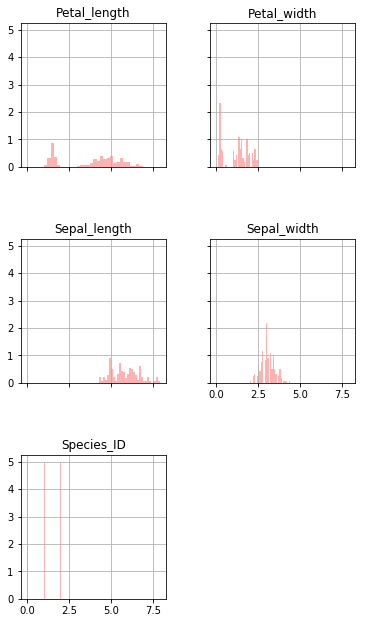

In [25]:
data.hist(bins=30, alpha=0.3, color='r', normed=True, sharex=True, sharey=True) #all plots on the same scale ~sharex,y
plt.subplots_adjust(left=None, bottom=1, right=None, top=3, wspace=None, hspace=0.5)

Example adapted from http://matplotlib.org/examples/statistics/histogram_demo_features.html

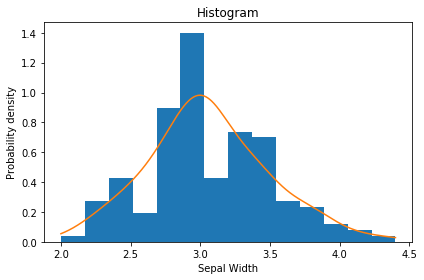

In [26]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy import stats

num_bins = 14
fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(data.Sepal_width, num_bins, normed=True)

ax.set_xlabel('Sepal Width')
ax.set_ylabel('Probability density')
ax.set_title('Histogram')

#Add a fitted line
max = np.max(data.Sepal_width)
min = np.min(data.Sepal_width)

kde = stats.gaussian_kde(data.Sepal_width)
xx = np.linspace(min, max, 1000)
ax.plot(xx, kde(xx))

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

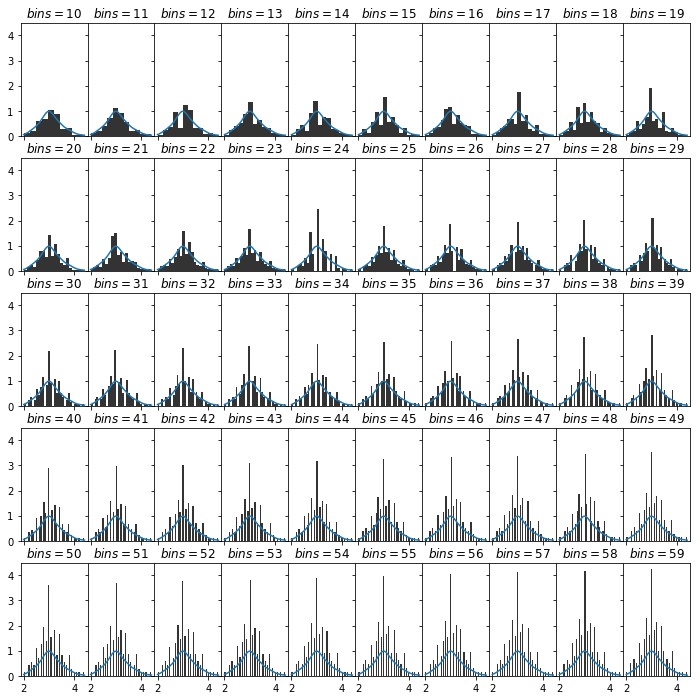

In [27]:
#Please note how the number of bins can change the shape of the histogram, but shape of the fitted curve does not 
#change

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy import stats

max = np.max(data.Sepal_width)
min = np.min(data.Sepal_width)
xx = np.linspace(min, max, 100)

k = 5
l = 10

fig, axes = plt.subplots(k, l, sharex=True, sharey=True,figsize=(12, 12)) 
for i in range(k):
    for j in range(l):
        n = 10 + i*10+j
        axes[i, j].hist(data.Sepal_width, n, color='k', normed=True, alpha=0.8)
        axes[i, j].set_title('$bins = %s$' %n )
        
        #Add a fitted line
        kde = stats.gaussian_kde(data.Sepal_width)
        axes[i, j].plot(xx, kde(xx))
        plt.subplots_adjust(wspace=0, hspace=0.2)
    
    
plt.show()

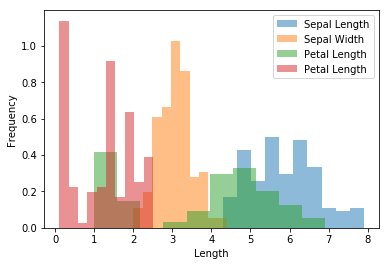

In [28]:
kwargs = dict(histtype='stepfilled', alpha=0.5, normed=True, bins=10)
plt.hist(data.Sepal_length, label='Sepal Length',**kwargs)
plt.hist(data.Sepal_width, label='Sepal Width',**kwargs)
plt.hist(data.Petal_length, label='Petal Length',**kwargs)
plt.hist(data.Petal_width, label='Petal Length',**kwargs)
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.legend()

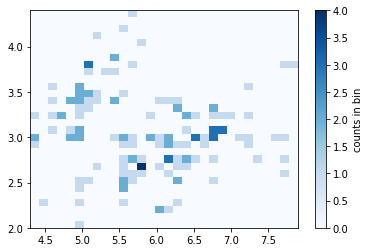

In [29]:
plt.hist2d(data.Sepal_length, data.Sepal_width, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

#### The data does not show how 2D histograms look like, we will simulate an example

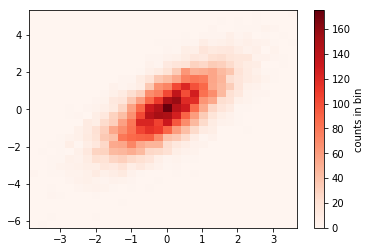

In [30]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

plt.hist2d(x, y, bins=30, cmap='Reds')
cb = plt.colorbar()
cb.set_label('counts in bin')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f9a5860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1f6eff60>]], dtype=object)

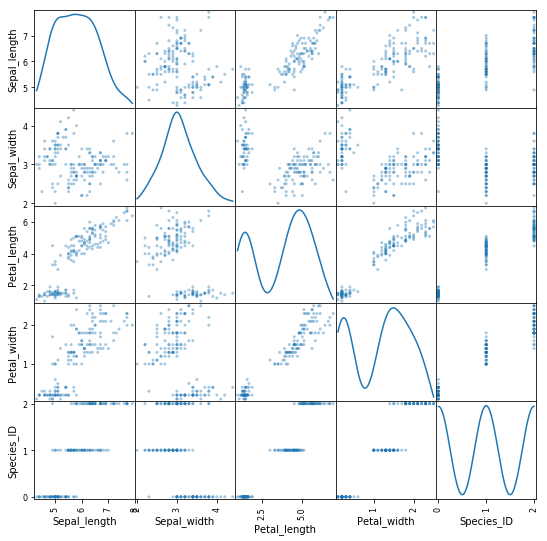

In [31]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.4, figsize=(9, 9), diagonal='kde')

Text(0,0.5,'Width')

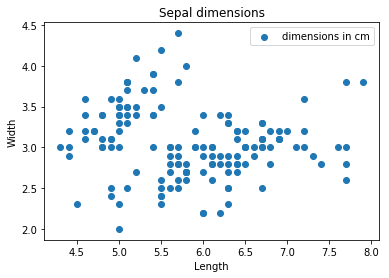

In [32]:
plt.scatter(data['Sepal_length'], data['Sepal_width'],label='dimensions in cm')
plt.legend(loc='best')
plt.title('Sepal dimensions')
plt.xlabel('Length')
plt.ylabel('Width')

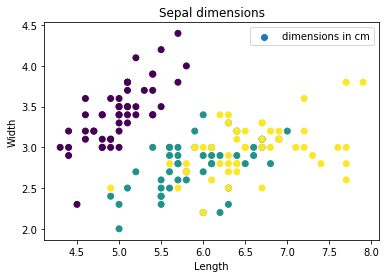

In [31]:
plt.scatter(data['Sepal_length'], data['Sepal_width'],label='dimensions in cm',c = data['Species_ID'])
plt.legend(loc='best')
plt.title('Sepal dimensions')
plt.xlabel('Length')
plt.ylabel('Width')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121850c90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1223450d0>]], dtype=object)

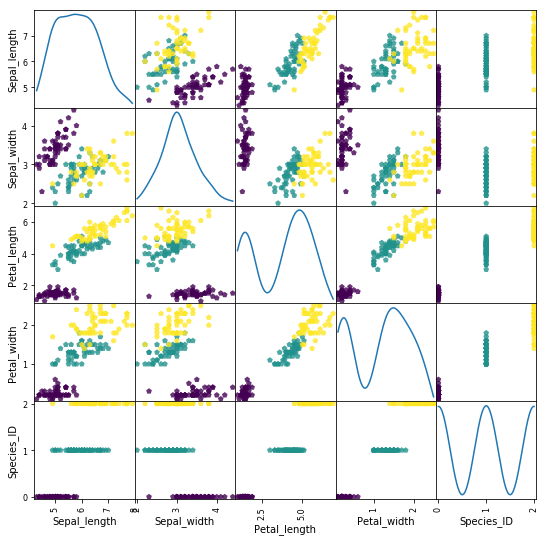

In [32]:
scatter_matrix(data, alpha=0.8, figsize=(9, 9), diagonal='kde',marker = 'p',c = data['Species_ID'])

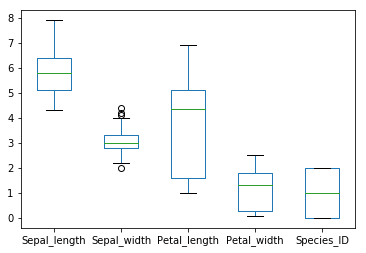

In [33]:
data.plot.box()

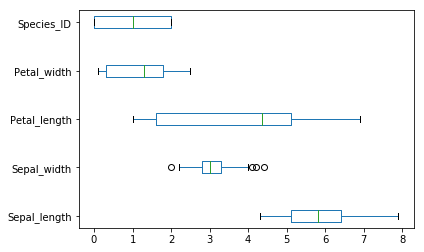

In [34]:
data.plot.box(vert=False, positions=[1, 3, 5, 7, 9])

### Seaborn
Seaborn is a libary that has further capabilities and it lays on top of matplotlib.

https://pypi.python.org/pypi/seaborn

http://seaborn.pydata.org/index.html


Mandatory dependencies

    numpy
    scipy
    matplotlib
    pandas
    
Recommended dependencies

    statsmodels

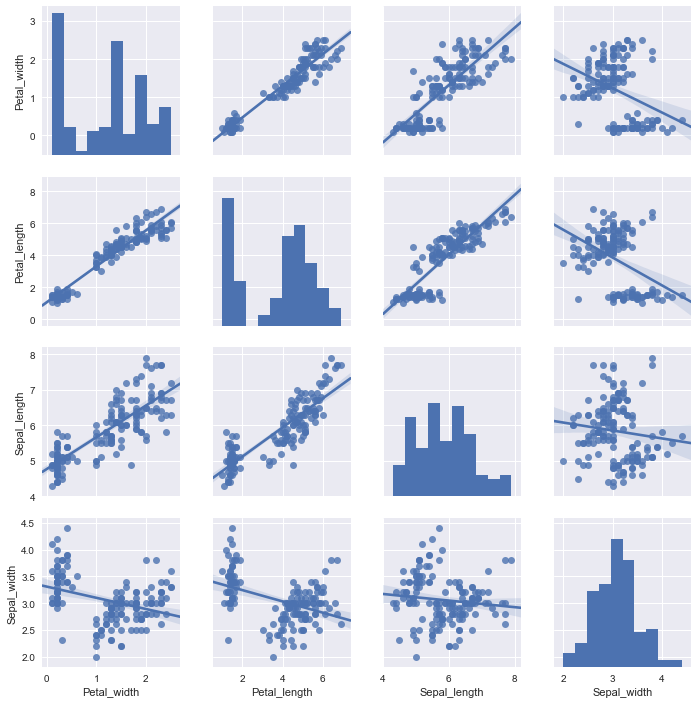

In [60]:
import seaborn as sns
sns.pairplot(data, vars=['Petal_width', 'Petal_length', 'Sepal_length', 'Sepal_width'], kind='reg')  

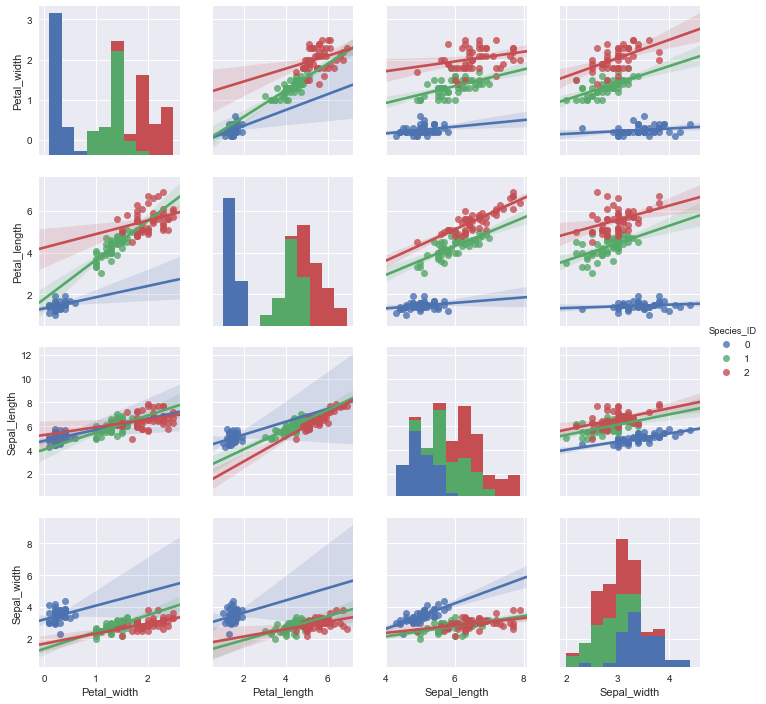

In [68]:
#Changing the hue helps to decide wich linear model to choose
sns.pairplot(data, vars=['Petal_width', 'Petal_length', 'Sepal_length', 'Sepal_width'], kind='reg', hue = 'Species_ID')  

## Statistical Analysis

There is more than one option when it comes to performing statistical analyses.  I will start using Statsmodels as it is compatible with a syntax similar to R.
Refer to http://www.statsmodels.org/stable/index.html.

In [35]:
%matplotlib inline

from __future__ import print_function
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import pandas as pd

/anaconda/envs/python2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [36]:
x = data.Petal_length
y = data.Petal_width
X = np.column_stack((x))
X = sm.add_constant(x) #if we want the model to have an intercept so we add a column of 1s
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Petal_width   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1876.
Date:                Sun, 16 Jul 2017   Prob (F-statistic):           5.90e-86
Time:                        17:35:59   Log-Likelihood:                 24.724
No. Observations:                 150   AIC:                            -45.45
Df Residuals:                     148   BIC:                            -39.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.3605      0.040     -9.062   

In [37]:
print('Parameters: ', results.params)
print('Standard errors: ', results.bse)
print('Predicted values: ', results.predict())

Parameters:  const          -0.360500
Petal_length    0.415248
dtype: float64
Standard errors:  const           0.039781
Petal_length    0.009587
dtype: float64
Predicted values:  [ 0.17932144  0.2208462   0.09627192  0.17932144  0.2208462   0.2208462
  0.2208462   0.30389572  0.26237096  0.26237096  0.26237096  0.30389572
  0.13779668  0.17932144  0.17932144  0.2208462   0.30389572  0.2208462
  0.34542047  0.2208462   0.2208462   0.26237096  0.26237096  0.26237096
  0.30389572  0.30389572  0.34542047  0.42846999  0.17932144  0.17932144
  0.2208462   0.2208462   0.26237096  0.30389572  0.05474717  0.2208462
  0.2208462   0.26237096  0.26237096  0.26237096  0.26237096  0.30389572
  0.34542047  0.42846999  0.17932144  0.34542047  0.13779668  0.26237096
  0.2208462   0.26237096  1.09286612  1.30048992  1.50811371  1.00981661
  1.30048992  1.46658895  1.00981661  1.17591564  1.2174404   0.88524233
  1.25896516  1.30048992  1.67421274  1.09286612  1.30048992  1.46658895
  1.25896516  1.2589

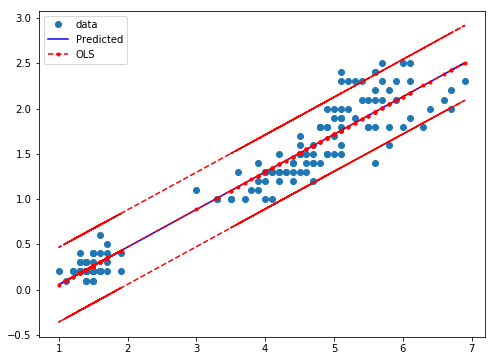

In [38]:
#Confidence intervals around the predictions are built using the wls_prediction_std command
prstd, iv_l, iv_u = wls_prediction_std(results)
fig = plt.figure()
fig, ax = plt.subplots(1,1,figsize=(8,6))

beta = np.array([results.params[0],results.params[1]])
y_pred = np.dot(X,beta)
ax.plot(x, y, 'o', label="data")
ax.plot(x, y_pred, 'b-', label="Predicted")
ax.plot(x, results.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');

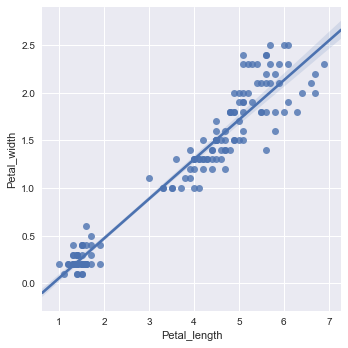

In [72]:
# Plot a simple regression, seaborn on top of charting does some sats
sns.lmplot(y='Petal_width', x='Petal_length', data=data)
plt.show()

In [46]:
from statsmodels.formula.api import ols
model = ols('Petal_width ~ Species + Petal_length', data).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:            Petal_width   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     842.9
Date:                Sun, 16 Jul 2017   Prob (F-statistic):           6.04e-92
Time:                        17:36:42   Log-Likelihood:                 46.649
No. Observations:                 150   AIC:                            -85.30
Df Residuals:                     146   BIC:                            -73.26
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [47]:
#Check the matrix scatterplot
model = ols('Petal_width ~ Species + Sepal_length', data).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:            Petal_width   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     738.7
Date:                Sun, 16 Jul 2017   Prob (F-statistic):           5.26e-88
Time:                        17:36:45   Log-Likelihood:                 37.324
No. Observations:                 150   AIC:                            -66.65
Df Residuals:                     146   BIC:                            -54.60
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [48]:
#An integer column can be forced to be treated as categorical using:
model = ols('Petal_width ~ C(Species_ID) + Sepal_length', data).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:            Petal_width   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     738.7
Date:                Sun, 16 Jul 2017   Prob (F-statistic):           5.26e-88
Time:                        17:36:47   Log-Likelihood:                 37.324
No. Observations:                 150   AIC:                            -66.65
Df Residuals:                     146   BIC:                            -54.60
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.4773      0

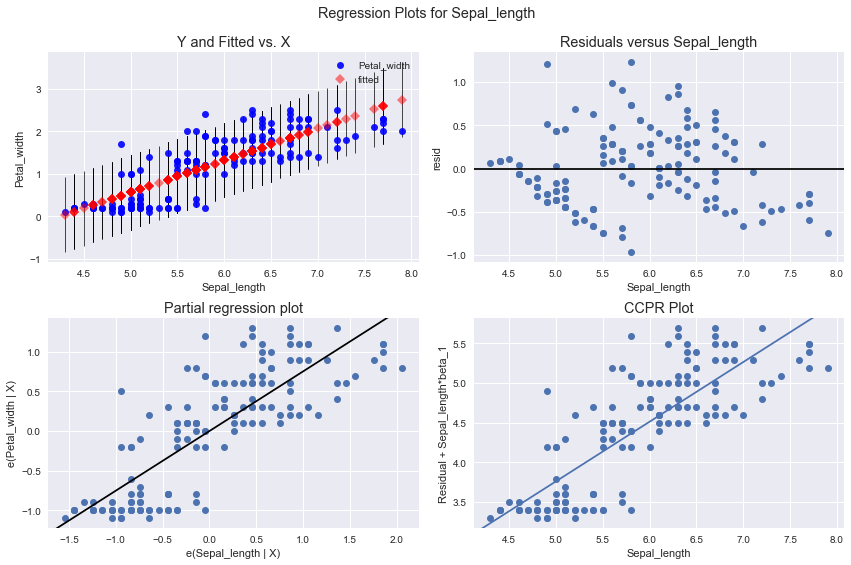

In [146]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, "Sepal_length", fig=fig)

In [150]:
model = ols('Petal_width ~ Sepal_length', data).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:            Petal_width   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     299.2
Date:                Sun, 16 Jul 2017   Prob (F-statistic):           2.32e-37
Time:                        19:22:14   Log-Likelihood:                -88.520
No. Observations:                 150   AIC:                             181.0
Df Residuals:                     148   BIC:                             187.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.1947      0.257    -12.450   

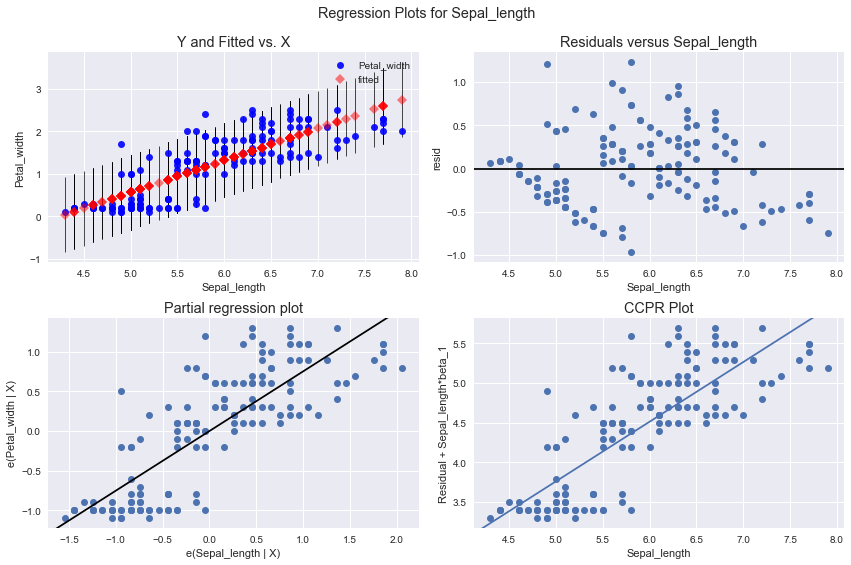

In [151]:
#Print Diagnostic Plots
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, "Sepal_length", fig=fig)

In [142]:
model = ols('Petal_width ~ Sepal_length+1', data).fit() # it does not change the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Petal_width   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     299.2
Date:                Sun, 16 Jul 2017   Prob (F-statistic):           2.32e-37
Time:                        19:16:55   Log-Likelihood:                -88.520
No. Observations:                 150   AIC:                             181.0
Df Residuals:                     148   BIC:                             187.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.1947      0.257    -12.450   

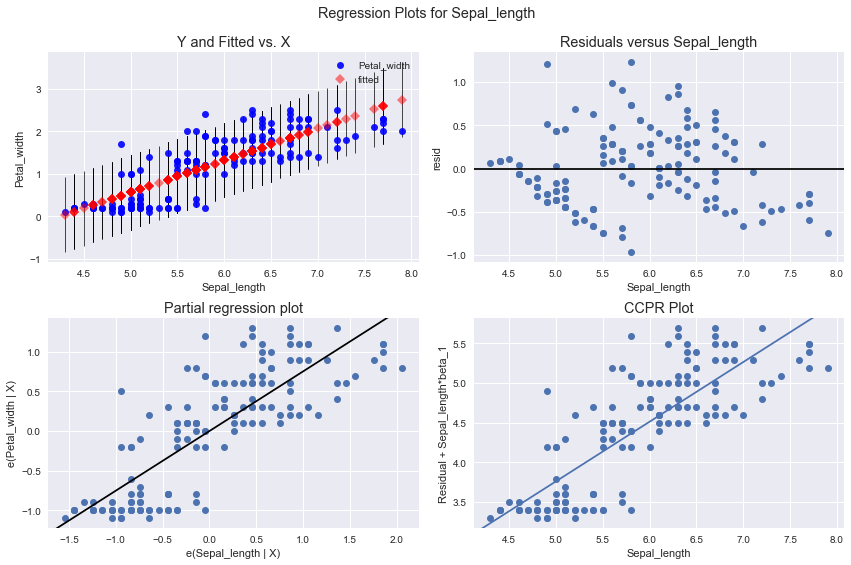

In [152]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, "Sepal_length", fig=fig)
# the funnel shape in the errors show that we are missing factors or that here are interactions

## Statistical Tests

For simple statistical tests, we will use the scipy.stats sub-module of scipys

* 1 sample t-test

In [87]:
from scipy import stats

#1-sample t-test
stats.ttest_1samp(data['Petal_length'], 0)

Ttest_1sampResult(statistic=26.072598612367706, pvalue=2.1660171997461104e-57)

The p-value = 10^-57 says that it reject the null, i.e. Petal_lengt = 0

* 2 sample t-test

In [102]:
#I want to test if the petal length if equal for setosa and virginica
setosa_pl = data[data['Species_ID'] == 0]['Petal_length']
virginica_pl = data[data['Species_ID'] == 2]['Petal_length']
stats.ttest_ind(setosa_pl, virginica_pl)   


Ttest_indResult(statistic=-49.98618625709593, pvalue=1.5048006992427703e-71)

{'boxes': [<matplotlib.lines.Line2D at 0x1284e3810>,
 'caps': [<matplotlib.lines.Line2D at 0x128505750>,
 'fliers': [<matplotlib.lines.Line2D at 0x1284cfa50>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1284cf410>,
 'whiskers': [<matplotlib.lines.Line2D at 0x123543090>,
  <matplotlib.lines.Line2D at 0x128766d10>]}

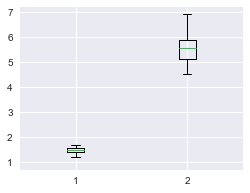

In [132]:
# Box plot of the two subsets
subdat = (setosa_pl,virginica_pl)
plt.figure(figsize=(4, 3))
plt.boxplot(subdat)